In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline 

In [3]:
churn1 = pd.read_csv("DATA/DATA_Customer-Churn.csv")

In [4]:
churn1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Convert column type
for column in churn1:
    if(churn1[column].dtype == 'object'):
        #churn1[column] = churn1[column].astype(str)
        churn1[column] = churn1[column].astype(dtype = 'string')

In [11]:
# Convert data types
genderColumn1 = churn1["gender"]
categoricalColumns = ["gender", "Partner", "Dependents", "PhoneService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Churn"]
numericalColumns = ["gender", "SeniorCitizen", "tenure", "Contract", "MonthlyCharges", "TotalCharges"]

for columnName in numericalColumns:
    churn1Cat = churn1.drop(numericalColumns, axis=1, inplace = False)
    
for columnName in categoricalColumns:
    churn1Num = churn1.drop(categoricalColumns, axis=1, inplace = False)

# Change numeric column types    
churn1Num["TotalCharges"] = pd.to_numeric(churn1Num["TotalCharges"],errors="coerce")
churn1Num["TotalCharges"] = churn1Num["TotalCharges"].astype(np.float64)
#churn1Num["TotalCharges"] = churn1Num["TotalCharges"].astype(float)
#churn1Num["TotalCharges"] = churn1Num["TotalCharges"].astype(dtype = 'float64')

churn1CatBin = churn1Cat
# Change string binary to numeric binary
for column in churn1Cat:
    churn1CatBin[column] = pd.DataFrame(churn1Cat[column].apply(lambda x : 1 if x=="Yes" else 0))
    
# Convert binary column types
for column in churn1CatBin:
    if(churn1CatBin[column].dtype == 'object'):
        churn1CatBin[column] = churn1CatBin[column].astype(dtype = 'int64')
        print(churn1CatBin[column].dtype)

In [12]:
# Concat categorical and numerical data
#churn2 = pd.concat([churn1CatBin, churn1Num], axis=1)
churn3 = pd.concat([churn1CatBin, churn1Num], axis=1)

# Count NAs
na_counts = churn3X.isna().sum()
#na_counts = churn3y.isna().sum()
na_counts

# Replace NAs with mean
# churn3=churn3.dropna().reset_index(drop=True)
churn3["TotalCharges"]=churn3["TotalCharges"].fillna(churn3["TotalCharges"].mean()).reset_index(drop=True)

In [13]:
# Select columns for analysis
columnsToKeep = ["SeniorCitizen", "MonthlyCharges", "TotalCharges"]

churn3X = pd.DataFrame(churn3["tenure"])
for column in columnsToKeep:
    churn3X[column] = churn3[column]
    #print(churn3X[column])

print(churn3X.shape)
churn3y = pd.DataFrame(churn3["Churn"])
print(churn3y.shape)

(7043, 4)
(7043, 1)


In [14]:
### Split data for modelling

In [15]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123   # specifies a sampling for repeatable results

In [16]:
X_train, X_test, y_train, y_test=train_test_split(churn3X, churn3y, test_size=TT_SPLIT,random_state=RAND_STATE) # splitting the data into train and test sets

In [17]:
X_train.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [23]:
### Scale data
# Create an instance of StandardScaler
ss = StandardScaler()

# Fit the StandardScaler to your data
ss.fit(X_train)

# Apply the power transform to your data
X_train_transformed = ss.transform(X_train)
X_test_transformed = ss.transform(X_test)

#plt.hist(varB)

#X_train_transformed.shape
type(X_train_transformed)
X_train_transformed = pd.DataFrame(X_train_transformed)

In [19]:
X_train.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [20]:
na_counts = X_train.isna().sum()
na_counts

tenure            0
SeniorCitizen     0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [21]:
X_train["TotalCharges"]

6924      69.350000
5249    4671.700000
5852    1474.750000
3597    2338.350000
4147    1901.000000
           ...     
5218    2283.300441
4060    3409.100000
1346    1258.600000
3454    1025.150000
3582     232.350000
Name: TotalCharges, Length: 5634, dtype: float64

E:\Programs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
E:\Programs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
E:\Programs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


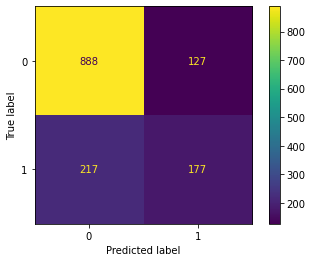

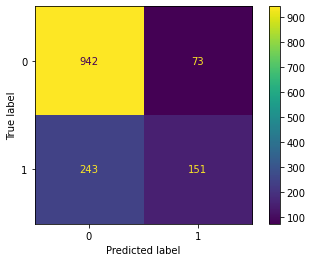

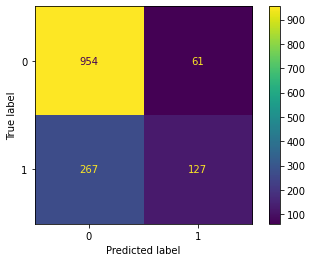

In [24]:
### Create KNN Model
numberOfNeighbors = [5, 20, 50]

for i in numberOfNeighbors:
    modelKNN = KNeighborsClassifier(n_neighbors=i,weights='uniform') # declare we're using knn classification model
    modelKNN.fit(X_train, y_train) # train model
    y_pred = modelKNN.predict(X_test) # predict test
    y_pred_train=modelKNN.predict(X_train) # predict train (for sanity checks)
    #model.predict_proba(inputdata)

    cm = confusion_matrix(y_test, y_pred, labels=modelKNN.classes_)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()

In [25]:
### Evaluate KNN Model
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test

print(y_train.shape)
print(y_pred_train.shape)
print(y_test.shape)
print(y_pred.shape)

print(type(y_train))
print(type(y_pred_train))
print(type(y_test))
print(type(y_pred))

print(y_train.head(3))
print(y_test.head(3))

In [26]:
y_train_np = y_train['Churn'].values
y_test_np = y_test['Churn'].values

print(y_train_np.shape)
print(y_pred_train.shape)
print(y_test_np.shape)
print(y_pred.shape)

In [27]:
evaluate_classification_model(y_train_np, y_pred_train, y_test_np, y_pred)

(  Error_metric  Train  Test
 0     Accuracy   0.79  0.77
 1    Precision   0.69  0.68
 2       Recall   0.34  0.32,
       Real  Predicted
 0        1          1
 1        0          0
 2        1          0
 3        0          0
 4        0          0
 ...    ...        ...
 5629     0          0
 5630     0          0
 5631     1          0
 5632     0          0
 5633     0          1
 
 [5634 rows x 2 columns],
       Real  Predicted
 0        0          0
 1        0          0
 2        0          0
 3        0          0
 4        0          0
 ...    ...        ...
 1404     1          1
 1405     1          0
 1406     1          1
 1407     0          0
 1408     0          0
 
 [1409 rows x 2 columns])

In [28]:
### Create and Evaluate Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

log_model = LogisticRegression() 

# Power Transformation
#trans = PowerTransformer()

#trans.fit(X_train)

#X_train_mod = trans.transform(X_train)
#X_test_mod  = trans.transform(X_test)

log_model.fit(X_train, y_train) # X_train_mod

y_pred_train_log = log_model.predict(X_train)#(X_train_mod)
y_pred_test_log = log_model.predict(X_test)#(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)


E:\Programs\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Error_metric,Train,Test
0,Accuracy,0.79,0.79
1,Precision,0.65,0.68
2,Recall,0.45,0.46


Confusion matrix for the train set
[[3802  357]
 [ 813  662]]
Confusion matrix for the test set
[[930  85]
 [212 182]]


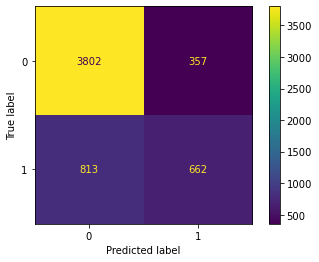

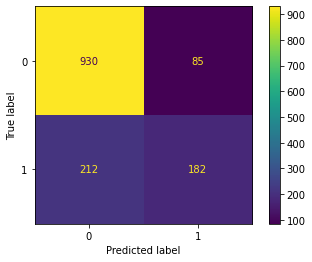

In [29]:
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

#cm_train = confusion_matrix(y_train, y_pred_train_log, labels = log_model.classes_)
#disp = ConfusionMatrixDisplay(cm_train)
#disp.plot()

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train,y_train, values_format = 'd') # X_train_mod

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test,y_test, values_format = 'd') # X_train_mod

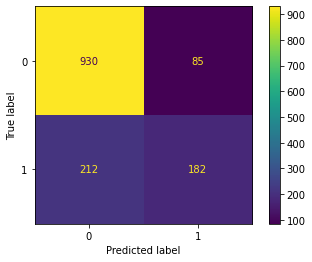

In [30]:
cm_test = confusion_matrix(y_test, y_pred_test_log, labels = log_model.classes_)
test = ConfusionMatrixDisplay(cm_test)
test.plot()

def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Prmecision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test



,Error_metric,Train,Test
0,Accuracy,0.79,0.77
1,Precision,0.64,0.64
2,Recall,0.41,0.42


,Error_metric,Train,Test
0,Accuracy,0.79,0.77
1,Precision,0.67,0.67
2,Recall,0.40,0.38


,Error_metric,Train,Test
0,Accuracy,0.80,0.78
1,Precision,0.68,0.65
2,Recall,0.46,0.42


,Error_metric,Train,Test
0,Accuracy,0.81,0.77
1,Precision,0.68,0.62
2,Recall,0.49,0.45


,Error_metric,Train,Test
0,Accuracy,0.81,0.77
1,Precision,0.69,0.60
2,Recall,0.53,0.48


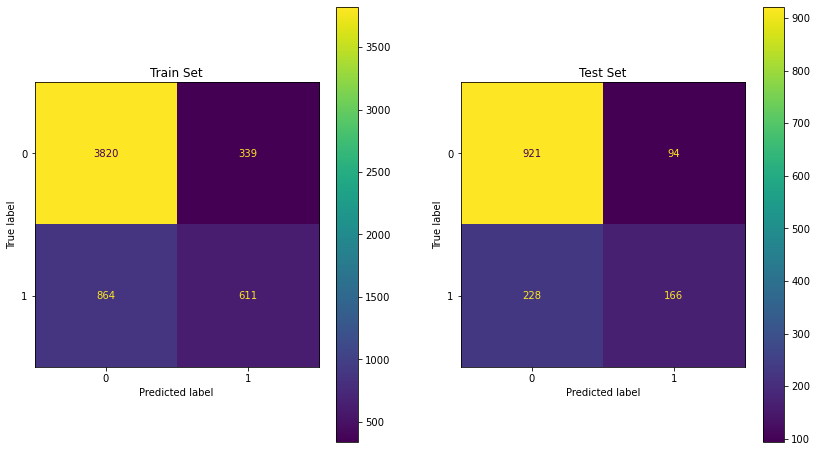

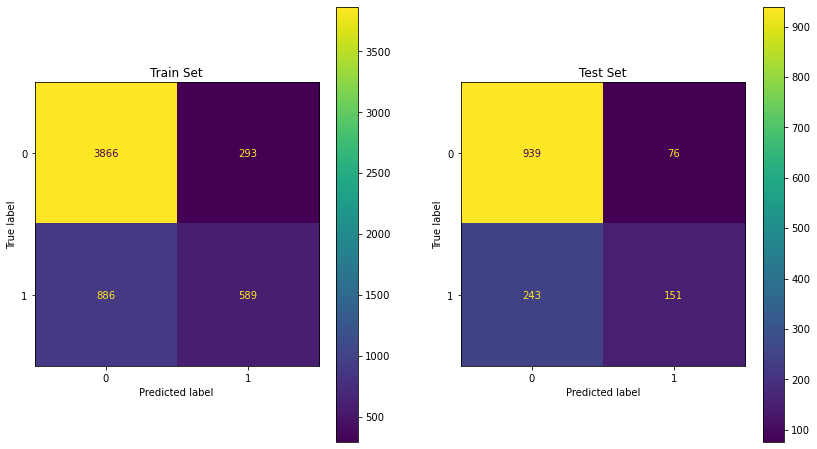

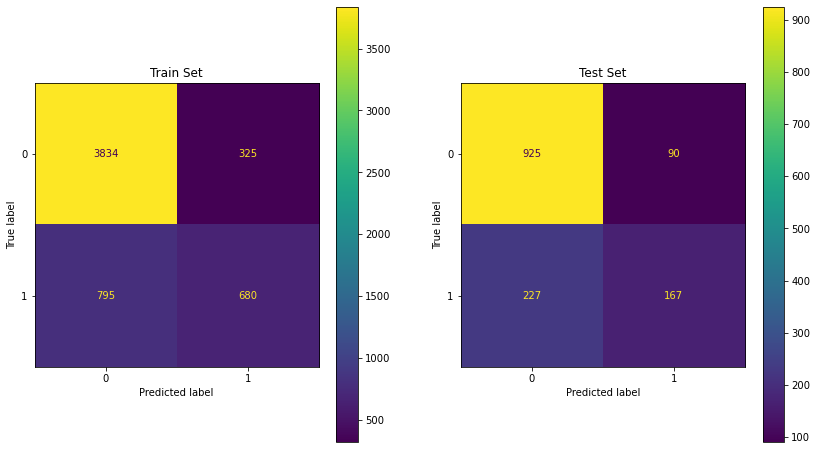

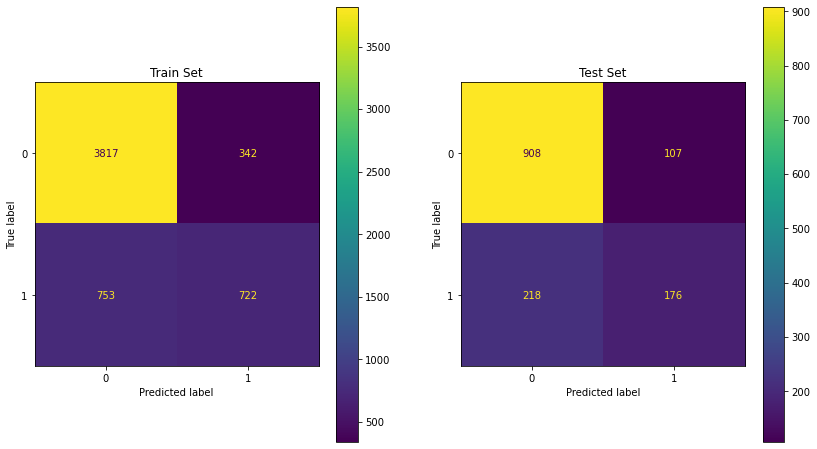

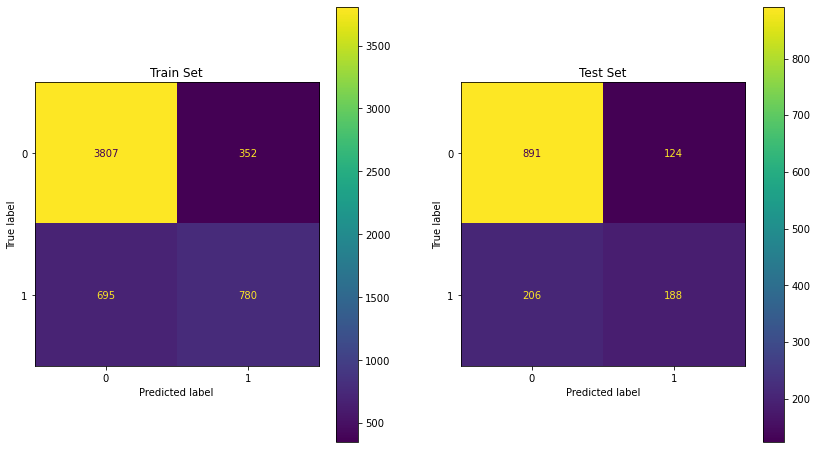

In [31]:
### Create and evaluate Decision Tree Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

depthNumbers = list(range(10)[3:8])

for i in depthNumbers:
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

    # Bear in mind that sklearn uses a different function for decission trees used for 
    # classification ( to predict a categorical feature ): DecisionTreeClassifier() 
    model = DecisionTreeClassifier(max_depth=i)

    model.fit(X_train, y_train)

    y_pred_train_dt = model.predict(X_train)
    y_pred_test_dt = model.predict(X_test)


    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                   'Train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt),
                                             recall_score(y_train, y_pred_train_dt)],
                                   'Test': [accuracy_score(y_test, y_pred_test_dt),
                                            precision_score(y_test, y_pred_test_dt),
                                            recall_score(y_test, y_pred_test_dt)]})

    display(performance_df)

    fig, ax = plt.subplots(1,2, figsize=(14,8))


    #print("Confusion matrix for the train set")
    #print(confusion_matrix(y_train,y_pred_train_dt).T)
    plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
    ax[0].title.set_text("Train Set")

    #print("Confusion matrix for the test set")

    #print(confusion_matrix(y_test,y_pred_test_dt).T)
    plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
    ax[1].title.set_text("Test Set")

<BarContainer object of 4 artists>

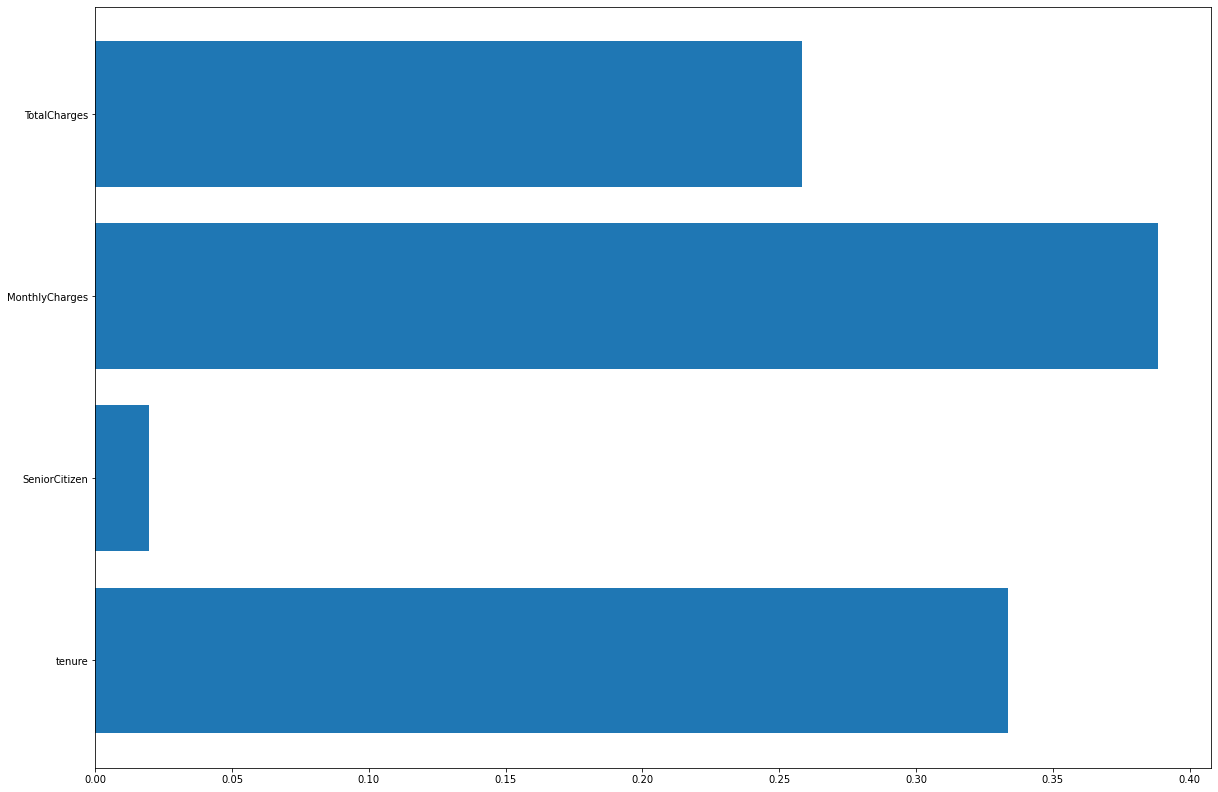

In [205]:
plt.figure(figsize=(20,14))
plt.barh(X_train.columns,model.feature_importances_)

In [34]:
#model1 = DecisionTreeClassifier()
#model2 = LogisticRegression()
#model3 = KNeighborsClassifier()

model1 = model
model2 = log_model
model3 = modelKNN

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

E:\Programs\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Programs\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Programs\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Programs\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

{'Classification Tree': 0.7736953921270415, 'Logistic Regression': 0.7891396546262339, 'KNN': 0.7779563783193407}


E:\Programs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
E:\Programs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
E:\Programs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
